In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense

In [5]:
data = """RNNs are good at sequence data 
They remember past information 
They are used in language modeling 
RNNs can generate text""" 

In [6]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts([data]) 
total_words = len(tokenizer.word_index) + 1

In [7]:
input_sequences = [] 
for line in data.split("\n"): 
  token_list = tokenizer.texts_to_sequences([line])[0] 
  for i in range(1, len(token_list)): 
      n_gram_sequence = token_list[:i+1] 
  input_sequences.append(n_gram_sequence)

In [8]:
max_seq_len = max([len(x) for x in input_sequences]) 
input_sequences = pad_sequences(input_sequences, 
maxlen=max_seq_len, padding='pre')

In [9]:
X, y = input_sequences[:,:-1], input_sequences[:,-1] 
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [10]:
def build_model(cell_type="SimpleRNN", units=100): 
  model = Sequential() 
  model.add(Embedding(total_words, 10, 
  input_length=max_seq_len-1))
  if cell_type == "SimpleRNN": 
    model.add(SimpleRNN(units)) 
  elif cell_type == "LSTM": 
    model.add(LSTM(units)) 
  elif cell_type == "GRU": 
    model.add(GRU(units)) 
  model.add(Dense(total_words, activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
  return model

In [11]:
models = {} 
histories = {} 
for cell in ["SimpleRNN", "LSTM", "GRU"]: 
   print(f"\nTraining {cell} model...") 
model = build_model(cell) 
history = model.fit(X, y, epochs=200, verbose=0) 
models[cell] = model 
histories[cell] = history 


Training SimpleRNN model...

Training LSTM model...

Training GRU model...


C:\Users\barka\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


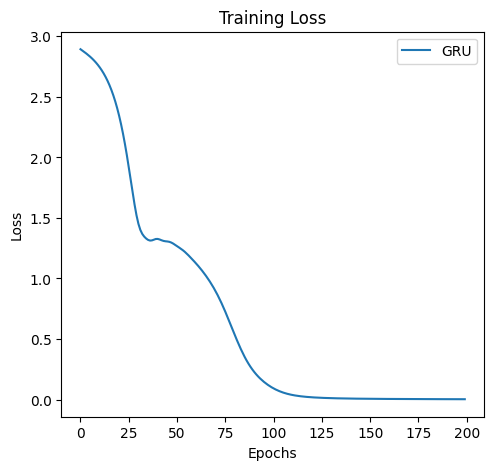

In [12]:
plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1) 
for cell, hist in histories.items(): 
  plt.plot(hist.history['loss'], label=cell) 
  plt.title("Training Loss") 
  plt.xlabel("Epochs") 
  plt.ylabel("Loss") 
  plt.legend() 